<a href="https://colab.research.google.com/github/rrl7012005/Deep-Learning-PyTorch/blob/main/Custom_CompVision_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instead of using a built-in dataset we can use our own dataset of pizza, steak and sushi images, and classify them.

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.__version__, device

('2.4.0+cu121', 'cuda')

We are going to use the Food101 dataset containing 1000 images of 101 different foods, but we will start with 3 classes and a random 10% of the set.

#Data Loading

In [ ]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import pathlib

data_dir = pathlib.Path("../data") #Setup the data directory

Import the Food101 Datset

In [ ]:
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              download=True)

test_data = datasets.Food101(root=data_dir,
                             split="test",
                             download=True)

train_data

100%|██████████| 4996278331/4996278331 [03:56<00:00, 21170078.17it/s]


Extracting ../data/food-101.tar.gz to ../data


Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [ ]:
class_names = train_data.classes
class_names[:10]

['pizza', 'steak', 'sushi']

churros


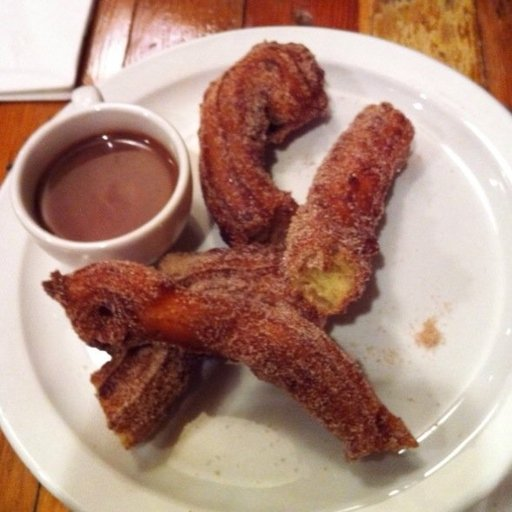

In [ ]:
print(class_names[train_data[0][1]]) #1 is the label 0 is the image
train_data[0][0]

So our current path setup is ../data/food-101/images/CLASS_NAME/IMAGES.jpg

In [ ]:
import random

data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi"]

amount_to_get = 1.0

def get_subset(image_path=data_path, data_splits=["train", "test"],
               target_classes=["pizza", "steak", "sushi"], amount=1.0, seed=42):
  random.seed(seed)
  label_splits = {}

  for data_split in data_splits:
    print(f"[INFO] Creating image split for: {data_split}...")
    label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"

    with open(label_path, "r") as f:
      labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

    number_to_sample = round(amount * len(labels))

    print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")

    sampled_images = random.sample(labels, k=number_to_sample)

    image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
    label_splits[data_split] = image_paths

  return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 2250 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 750 images for test...


[PosixPath('../data/food-101/images/pizza/3269634.jpg'),
 PosixPath('../data/food-101/images/pizza/1524655.jpg'),
 PosixPath('../data/food-101/images/steak/2825100.jpg'),
 PosixPath('../data/food-101/images/steak/225990.jpg'),
 PosixPath('../data/food-101/images/steak/1839481.jpg'),
 PosixPath('../data/food-101/images/pizza/38349.jpg'),
 PosixPath('../data/food-101/images/pizza/3018077.jpg'),
 PosixPath('../data/food-101/images/sushi/93139.jpg'),
 PosixPath('../data/food-101/images/pizza/2702825.jpg'),
 PosixPath('../data/food-101/images/sushi/200025.jpg')]

Now we have gotten pizza, steak, sushi images only.

Now lets move training and testing images to dedicated folder.

In [ ]:
target_dir_name = f"../data/pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data/pizza_steak_sushi_100_percent'


In [ ]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        # print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

In [ ]:
def walk_through_dir(dir_path):

  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/pizza_steak_sushi_100_percent'.
There are 3 directories and 0 images in '../data/pizza_steak_sushi_100_percent/train'.
There are 0 directories and 750 images in '../data/pizza_steak_sushi_100_percent/train/sushi'.
There are 0 directories and 750 images in '../data/pizza_steak_sushi_100_percent/train/pizza'.
There are 0 directories and 750 images in '../data/pizza_steak_sushi_100_percent/train/steak'.
There are 3 directories and 0 images in '../data/pizza_steak_sushi_100_percent/test'.
There are 0 directories and 250 images in '../data/pizza_steak_sushi_100_percent/test/sushi'.
There are 0 directories and 250 images in '../data/pizza_steak_sushi_100_percent/test/pizza'.
There are 0 directories and 250 images in '../data/pizza_steak_sushi_100_percent/test/steak'.


Zip up images folder to be more easily transported

In [ ]:
zip_file_name = data_dir / f"pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/data/pizza_steak_sushi_100_percent.zip'

In [ ]:

!ls -la ../data/

total 4909956
drwxr-xr-x 4 root root       4096 Sep 14 14:49 .
drwxr-xr-x 1 root root       4096 Sep 14 14:43 ..
drwxr-xr-x 4 3156  320       4096 Jul  9  2014 food-101
-rw-r--r-- 1 root root 4996278331 Sep 14 14:48 food-101.tar.gz
drwxr-xr-x 4 root root       4096 Sep 14 14:49 pizza_steak_sushi_20_percent
-rw-r--r-- 1 root root   31491084 Sep 14 14:50 pizza_steak_sushi_20_percent.zip


In [ ]:
!mkdir -p pizza_steak_sushi
!unzip ../data/pizza_steak_sushi_100_percent.zip -d pizza_steak_sushi

Archive:  ../data/pizza_steak_sushi_100_percent.zip
   creating: pizza_steak_sushi/test/
   creating: pizza_steak_sushi/train/
   creating: pizza_steak_sushi/train/pizza/
   creating: pizza_steak_sushi/train/steak/
   creating: pizza_steak_sushi/train/sushi/
  inflating: pizza_steak_sushi/train/sushi/2623508.jpg  
  inflating: pizza_steak_sushi/train/sushi/3656702.jpg  
  inflating: pizza_steak_sushi/train/sushi/2458165.jpg  
  inflating: pizza_steak_sushi/train/sushi/888777.jpg  
  inflating: pizza_steak_sushi/train/sushi/1334264.jpg  
  inflating: pizza_steak_sushi/train/sushi/548408.jpg  
  inflating: pizza_steak_sushi/train/sushi/1771901.jpg  
  inflating: pizza_steak_sushi/train/sushi/3058897.jpg  
  inflating: pizza_steak_sushi/train/sushi/979029.jpg  
  inflating: pizza_steak_sushi/train/sushi/448592.jpg  
  inflating: pizza_steak_sushi/train/sushi/1929941.jpg  
  inflating: pizza_steak_sushi/train/sushi/927987.jpg  
  inflating: pizza_steak_sushi/train/sushi/2513376.jpg  
  inf

In [ ]:
!ls ../data

food-101  food-101.tar.gz  pizza_steak_sushi_20_percent  pizza_steak_sushi_20_percent.zip


In [ ]:

walk_through_dir("pizza_steak_sushi")

There are 2 directories and 0 images in 'pizza_steak_sushi'.
There are 3 directories and 0 images in 'pizza_steak_sushi/train'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/sushi'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'pizza_steak_sushi/test'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/sushi'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/steak'.


In [ ]:
!ls

pizza_steak_sushi  sample_data


Load the data

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


We need to take this data structure and turn it into a usable dataset with pytorch

In [ ]:
image_path = pathlib.Path("pizza_steak_sushi")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'pizza_steak_sushi'.
There are 3 directories and 0 images in 'pizza_steak_sushi/train'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/sushi'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'pizza_steak_sushi/test'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/sushi'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak_sushi/test/steak'.


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('pizza_steak_sushi/train'), PosixPath('pizza_steak_sushi/test'))

There we go

Random image path: pizza_steak_sushi/test/pizza/2398925.jpg
Image class: pizza
Image height: 512
Image width: 512


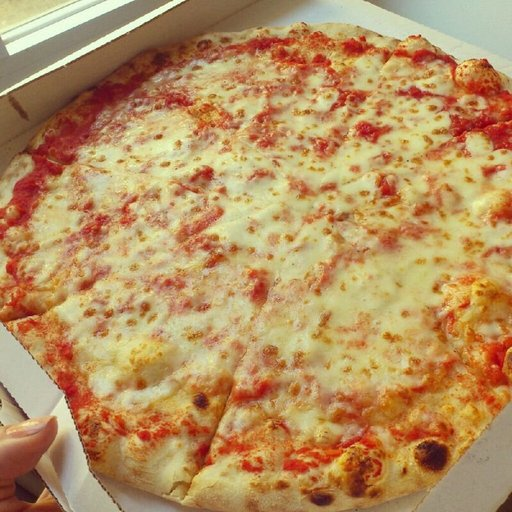

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Can do the same with matplotlib but first have to convert to a numpy array.

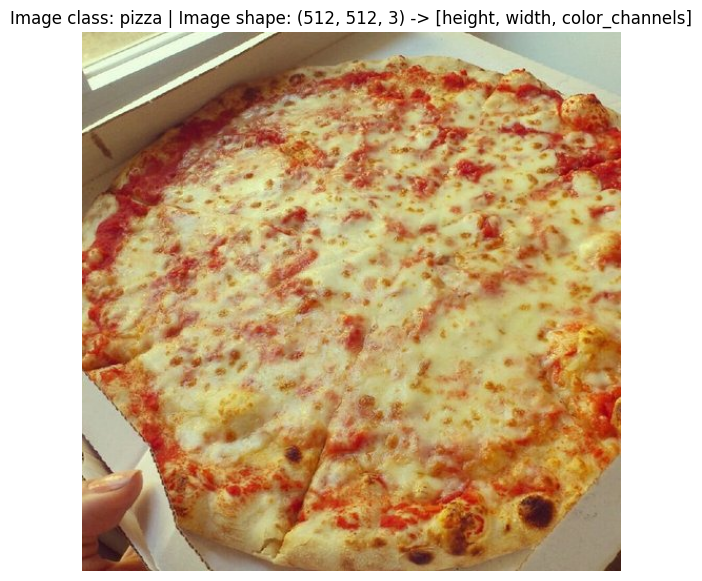

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

#Data Cleaning

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

Use torchvision.transforms to format images, data augmentation.

Resize the images using transforms.Resize
Flip images randomly using transforms.RandomHorizontalFlip(). We can turn our images from a PIL image to a PyTorch tensor .ToTensor

We can compile these steps using torchvision.transforms.Compose()

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5), #probability of flip
    transforms.ToTensor()
])

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

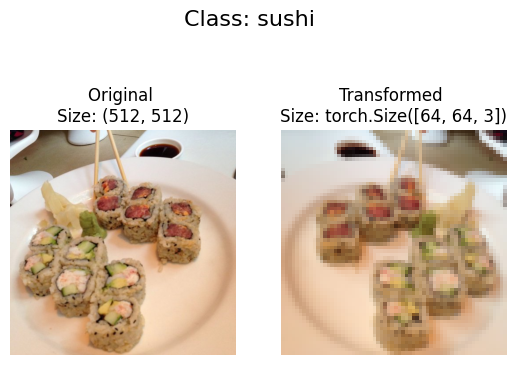

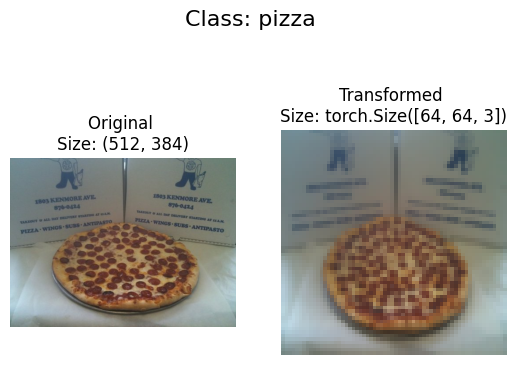

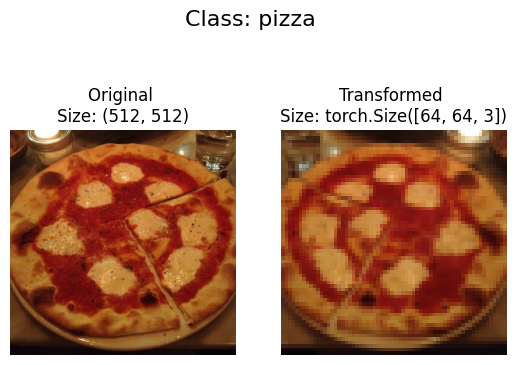

In [ ]:
plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

So now we have gotten our image into a tensor. Now we need to turn the image data into a Dataset capable of being used with PyTorch.

We can use the class torchvision.datasets.ImageFolder since our data is in standard image classification format. We can then pass it the file path of a target image directory as well as a series of transforms to perform on our images.

In [ ]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None) #No transforms on labels

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 2250
    Root location: pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 750
    Root location: pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


So now we have our Dataset, lets inspect them

In [ ]:
class_names = train_data.classes

#Can get class names as a dict
class_dict = train_data.class_to_idx

class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
len(train_data), len(test_data)

(2250, 750)

In [ ]:
img, label = train_data[0][0], train_data[0][1]

print(img)
print(label)

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

Theres too little data so we need to do data augmentation.

Our images are currently in the form of a tensor (3, 64, 64).

Lets plot an image, but we need to permute the dimensions as matplotlib uses HWC.

Text(0.5, 1.0, 'pizza')

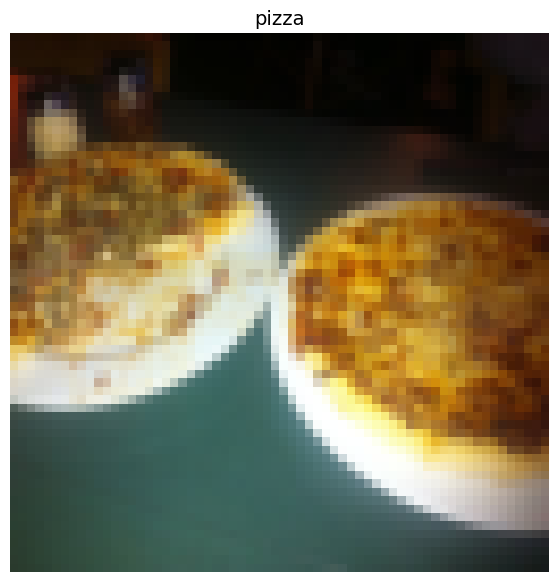

In [ ]:
img_permute = img.permute(1, 2, 0)

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis("off");
plt.title(class_names[label], fontsize=14)

We have got our image as a PyTorch Dataset but now lets turn them into DataLoaders using torch.utils.data.DataLoader. This makes the dataset iterable so the model can loop through.

For now we will use batch_size=1, and num_workers=1 where um_workers is the number of threads used in cpu, set it to os.cpu_count()

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

img, label = next(iter(train_dataloader))

img, label

(tensor([[[[0.6078, 0.6078, 0.6157,  ..., 0.5294, 0.5294, 0.4667],
           [0.6275, 0.6275, 0.6235,  ..., 0.6275, 0.6235, 0.6078],
           [0.6627, 0.6549, 0.6510,  ..., 0.5255, 0.5961, 0.6588],
           ...,
           [0.2275, 0.2118, 0.1804,  ..., 0.4824, 0.5294, 0.5843],
           [0.2039, 0.1843, 0.1686,  ..., 0.5255, 0.5804, 0.6157],
           [0.1882, 0.1686, 0.1490,  ..., 0.5725, 0.6196, 0.6353]],
 
          [[0.5922, 0.5961, 0.6118,  ..., 0.4941, 0.5098, 0.4510],
           [0.6118, 0.6157, 0.6196,  ..., 0.5922, 0.5804, 0.5647],
           [0.6392, 0.6392, 0.6353,  ..., 0.4902, 0.5608, 0.6196],
           ...,
           [0.1843, 0.1686, 0.1490,  ..., 0.3294, 0.3882, 0.4667],
           [0.1647, 0.1529, 0.1373,  ..., 0.3804, 0.4510, 0.5098],
           [0.1490, 0.1373, 0.1255,  ..., 0.4431, 0.4980, 0.5373]],
 
          [[0.6510, 0.6627, 0.6824,  ..., 0.5725, 0.6000, 0.5608],
           [0.6667, 0.6745, 0.6745,  ..., 0.6431, 0.6235, 0.6118],
           [0.6941, 0.69

Now what if a prebuilt dataste creator like datasets.ImageFolder didnt exist for our specific problem (for example audio or some other data type).

Then we could build our own, we can create a Dataset out of almost anything.

So lets work on that

#Custom Dataset

Remember how instances of datasets.ImageFolder allowed us to use classes and class_to_idx attributes.

Lets create a helper function capable of creating list of class names and dictionary names given a directory path.

Get class names using os.scandir to traverse a target directory.

In [ ]:
import os

target_directory = train_dir

class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])

class_names_found

['pizza', 'steak', 'sushi']

In [ ]:
from typing import Tuple, Dict, List

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:

    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

We need to subclass torch.utils.data.Dataset and intialize our subclass with a targ_dir and transform parameter. Create several attributes for paths, transform, classes etc.

We also need to create a function to load images from file and return them, this could be using PIL or torchvision.io

Overwrite the __len__ __getitem__ method of utils.data.Dataset

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

  def __init__(self, targ_dir: str, transform=None) -> None:

    #Get all image paths

    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

    #Setup transforms

    self.transform = transform

    self.classes, self.class_to_idx = find_classes(targ_dir)

  #Load images
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7c51a946afb0>,
 <__main__.ImageFolderCustom at 0x7c51aa45b070>)

Our own custom dataset

In [ ]:
print(len(train_data_custom), len(test_data_custom))
print(train_data_custom.classes)
print(train_data_custom.class_to_idx)

2250 750
['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


Its same as original Dataset

In [ ]:
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


Lets create function to display random images.

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


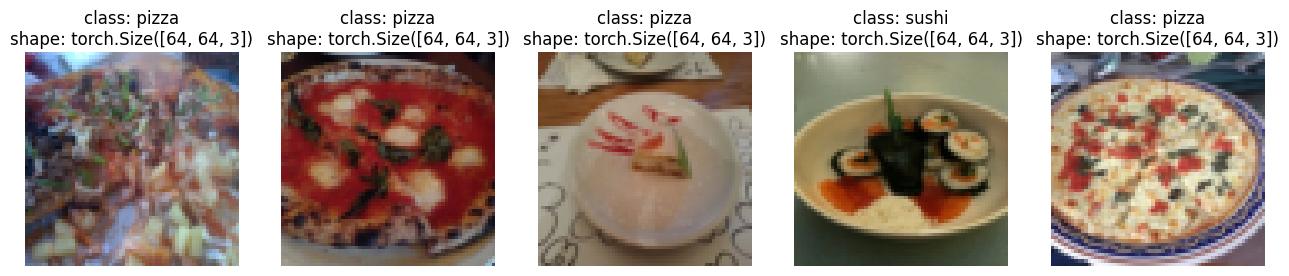

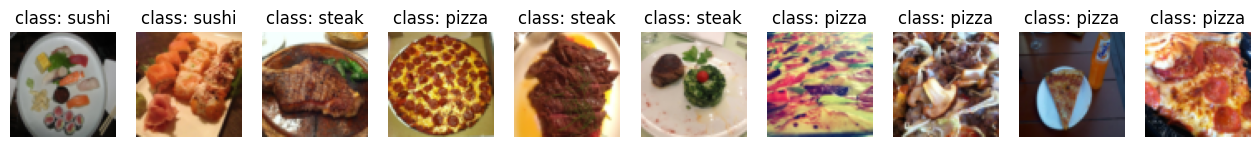

In [ ]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

display_random_images(train_data_custom,
                      n=12,
                      classes=class_names,
                      seed=None)

Now turn it into DataLoader

In [ ]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=1,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False)

len(train_dataloader_custom), len(test_dataloader_custom)

(2250, 750)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


#Data Augmentation

Random Transforms perform better than hand picked transforms.

TrivialAugment randomly picks from a set of transforms at a random magnitude. The main argument is num_magnitude_bins = 31. This defines how much of a range an intensity value will be picked to apply a certain transform, 0 being no range and 31 being the maximum range (highest chance for highest intensity).



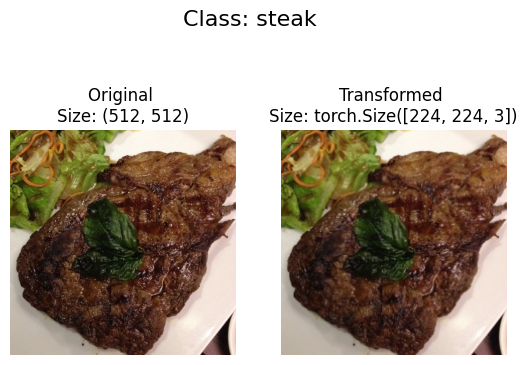

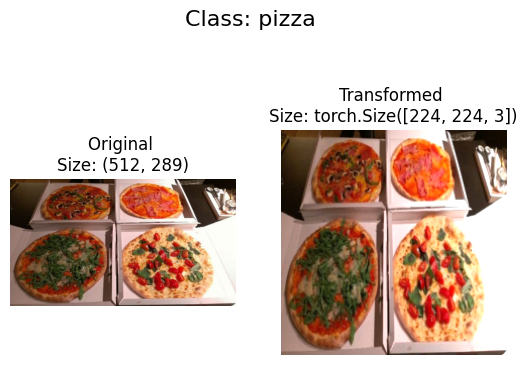

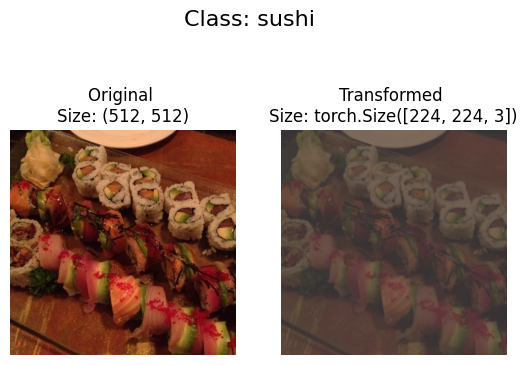

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor()
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

#Training a Model

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7c51aae2ae00>,
 <torch.utils.data.dataloader.DataLoader at 0x7c51aae29210>)

In [ ]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

Using operator fusion i.e. putting all the layers in brackets rather than in functional form is faster as we do not have to reassign x everytime, saves memory as well.

Test the model by doing a forward pass on a single image.

In [ ]:
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
2


Use torchinfo to get an idea of the shapes going through our model.

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

NameError: name 'model_0' is not defined

It also gives the total number of parameters.

Now lets create the training and testing loops.

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):

        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

    model.eval()

    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

Create a train function to combine train_step and test_step

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

Now lets train and evaluate our model. You need separate seeds for cpu and gpu

In [ ]:
%%time

torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
CPU times: user 6.02 s, sys: 1.69 s, total: 7.71 s
Wall time: 16.8 s


Plot the loss curves

Now model_0_results returns a dictionary

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

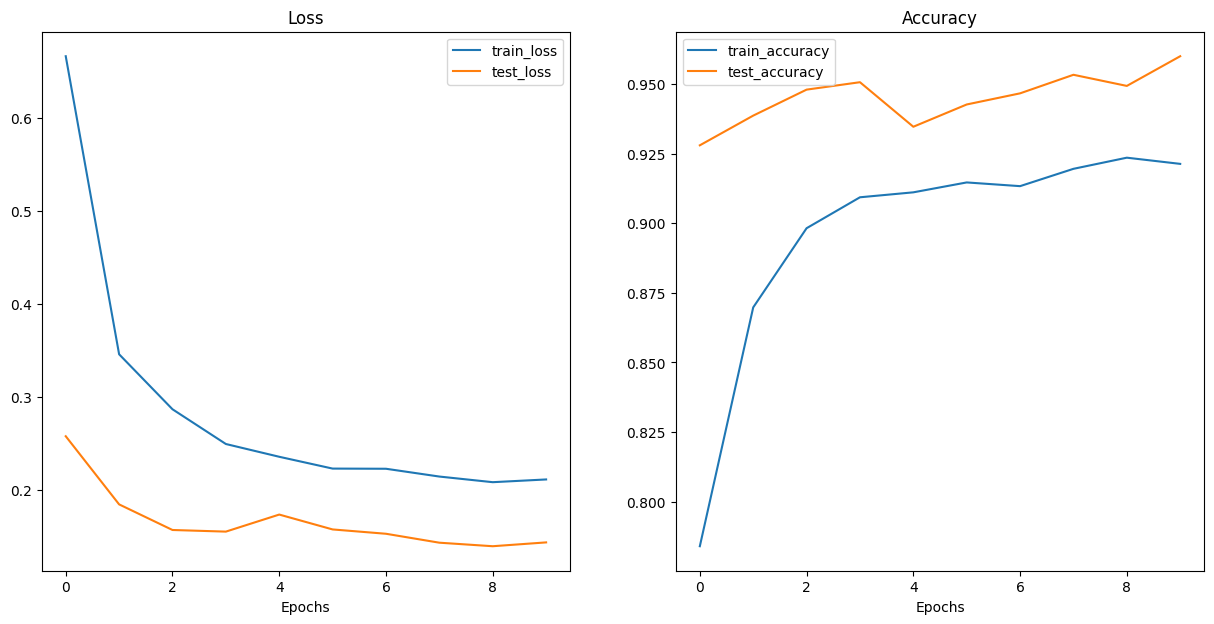

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

plot_loss_curves(results)

To avoid overfitting, get more data or data augmentation. Simplify the model, use dropout, lr decay, early stopping. Can also use transfer learning by using a pre trained model and tweak it to specialize for food images.

To avoid underfitting, add more layers and units, lower the learning rate, train for longer, use less regularization.

Transfer learning is probably the best for overfitting if there exists a similar model.

#Training with Data Augmentation

In [ ]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 2250
     Root location: pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 750
     Root location: pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c51aabd2ec0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c51ab12fd60>)

In [ ]:
m, n = next(iter(train_data_augmented)), next(iter(test_data_simple))
m[0].shape, n[0].shape

(torch.Size([3, 64, 64]), torch.Size([3, 64, 64]))

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
%%time

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 1.1625 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 1.1482 | test_acc: 0.2604
CPU times: user 6.32 s, sys: 1.74 s, total: 8.06 s
Wall time: 22.9 s


In [ ]:
plot_loss_curves(model)

TypeError: 'EfficientNet' object is not subscriptable

#Comparing Models and Predicting

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

NameError: name 'model_1_results' is not defined

In [ ]:
import pandas as pd
model_2_df = pd.DataFrame(model_2_results)

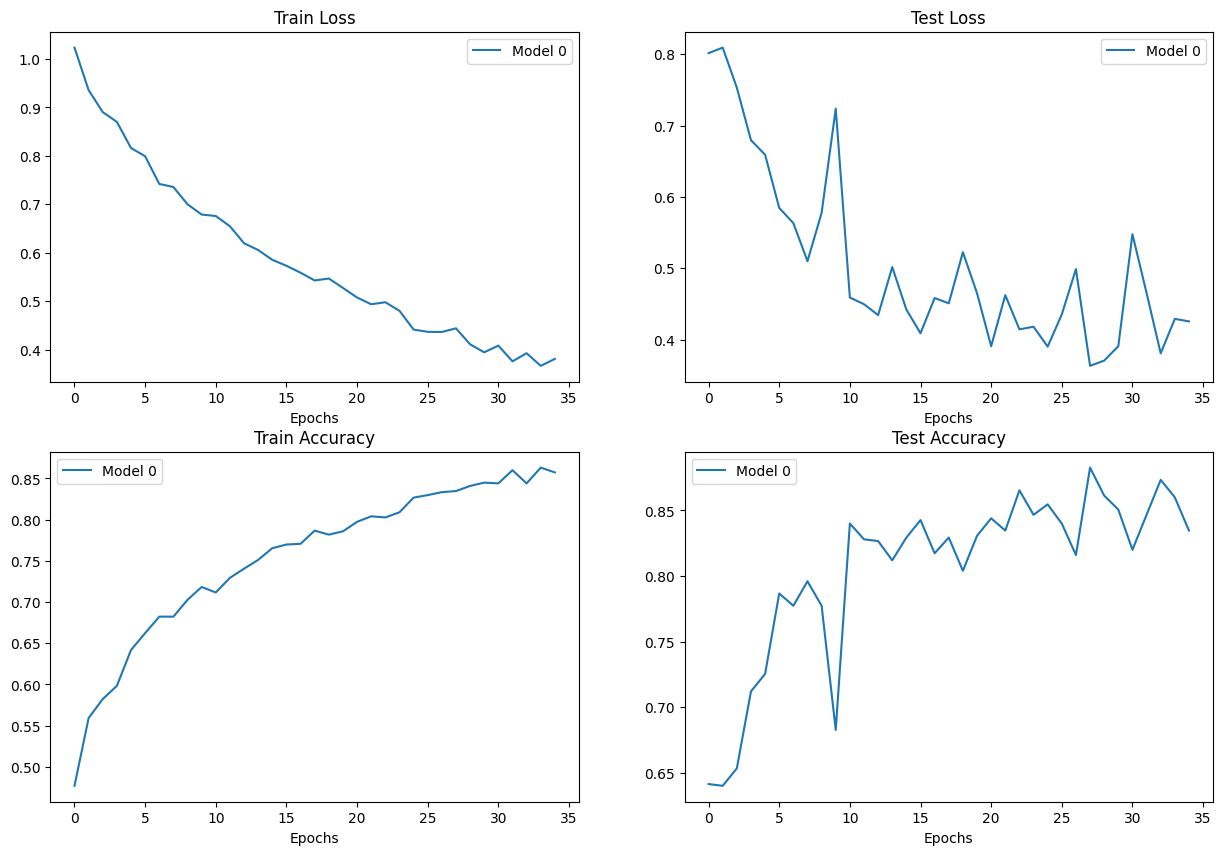

In [ ]:
plt.figure(figsize=(15, 10))

model_0_df = model_2_df
# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
# plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
# plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
# plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
# plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

Now to make a prediction on a custom image, we need to preprocess it so it reflects how our model was trained.

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

Now we just need to load the image, use torchvision.io.read_image

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image = custom_image / 255.

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

Need to reshape the image

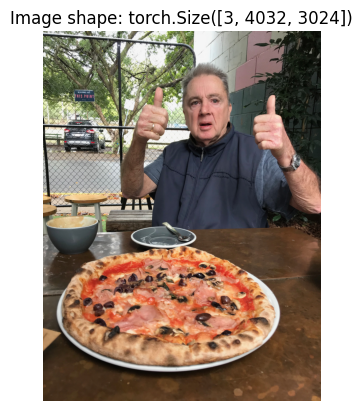

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [ ]:
model_2.eval()
with torch.inference_mode():

    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)


    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    custom_image_pred = model_2(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


Device, shape and datatype has to be the same.

In [ ]:
custom_image_pred

tensor([[ 0.1188,  0.0339, -0.1486]])

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.1567,  1.4795, -0.5832]], device='cuda:0')
Prediction probabilities: tensor([[0.1912, 0.7176, 0.0912]], device='cuda:0')
Prediction label: tensor([1], device='cuda:0')


In [ ]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class, custom_image_pred_probs

('steak', tensor([[0.1912, 0.7176, 0.0912]], device='cuda:0'))

Make a function for this

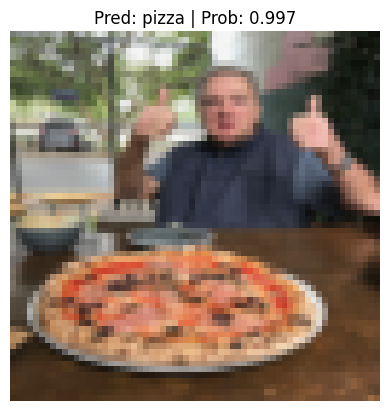

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

#My own Model

In [ ]:
import torch
import torch.nn as nn

class MyNet(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=12,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(12),
            nn.Conv2d(in_channels=12,
                      out_channels=12,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(12),
            nn.MaxPool2d(kernel_size=2, stride=1)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(12, 36, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(36),
            nn.Conv2d(36, 36, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(36),
            nn.MaxPool2d(2)
        )

        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(36, 72, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(72),
            nn.Conv2d(72, 72, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(72),
            nn.MaxPool2d(2)
        )

        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(72, 144, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(144),
            nn.Conv2d(144, 144, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(144),
            nn.MaxPool2d(2)
        )

        self.conv_block_5 = nn.Sequential(
            nn.Conv2d(144, 288, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(288),
            nn.Conv2d(288, 288, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(288),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*5*5, out_features=512),
            nn.ReLU(),
            nn.Dropout(p=0.2),  # Dropout layer with 20% probability
            nn.Linear(in_features=512, out_features=32),
            nn.ReLU(),
            nn.Dropout(p=0.2),  # Dropout layer with 20% probability
            nn.Linear(in_features=32, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        y = self.conv_block_1(x)
        y = self.conv_block_2(y)
        y = self.conv_block_3(y)
        y = self.conv_block_4(y)
        y = self.conv_block_5(y)
        return self.classifier(y)

torch.manual_seed(42)
model_2 = MyNet(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=288,
                  output_shape=len(train_data.classes)).to(device)
model_2

MyNet(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(12, 36, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(36, 36, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0):

In [ ]:
summary(model_2, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
MyNet                                    [1, 3]                    --
├─Sequential: 1-1                        [1, 12, 63, 63]           --
│    └─Conv2d: 2-1                       [1, 12, 64, 64]           336
│    └─ReLU: 2-2                         [1, 12, 64, 64]           --
│    └─BatchNorm2d: 2-3                  [1, 12, 64, 64]           24
│    └─Conv2d: 2-4                       [1, 12, 64, 64]           1,308
│    └─ReLU: 2-5                         [1, 12, 64, 64]           --
│    └─BatchNorm2d: 2-6                  [1, 12, 64, 64]           24
│    └─MaxPool2d: 2-7                    [1, 12, 63, 63]           --
├─Sequential: 1-2                        [1, 36, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 36, 64, 64]           1,764
│    └─ReLU: 2-9                         [1, 36, 64, 64]           --
│    └─BatchNorm2d: 2-10                 [1, 36, 64, 64]           72
│    └─C

In [ ]:
%%time

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 35

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=3e-4)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/35 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0236 | train_acc: 0.4769 | test_loss: 0.8018 | test_acc: 0.6413
Epoch: 2 | train_loss: 0.9359 | train_acc: 0.5591 | test_loss: 0.8095 | test_acc: 0.6400
Epoch: 3 | train_loss: 0.8904 | train_acc: 0.5822 | test_loss: 0.7533 | test_acc: 0.6533
Epoch: 4 | train_loss: 0.8703 | train_acc: 0.5982 | test_loss: 0.6797 | test_acc: 0.7120
Epoch: 5 | train_loss: 0.8163 | train_acc: 0.6418 | test_loss: 0.6593 | test_acc: 0.7253
Epoch: 6 | train_loss: 0.7994 | train_acc: 0.6622 | test_loss: 0.5847 | test_acc: 0.7867
Epoch: 7 | train_loss: 0.7422 | train_acc: 0.6822 | test_loss: 0.5635 | test_acc: 0.7773
Epoch: 8 | train_loss: 0.7358 | train_acc: 0.6822 | test_loss: 0.5101 | test_acc: 0.7960
Epoch: 9 | train_loss: 0.7002 | train_acc: 0.7027 | test_loss: 0.5777 | test_acc: 0.7773
Epoch: 10 | train_loss: 0.6790 | train_acc: 0.7182 | test_loss: 0.7239 | test_acc: 0.6827
Epoch: 11 | train_loss: 0.6760 | train_acc: 0.7116 | test_loss: 0.4591 | test_acc: 0.8400
Epoch: 12 | train_l

In [ ]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=255),
    transforms.ToTensor()
])


test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_dataloader_simple = DataLoader(train_data_augmented,
                                     batch_size=30,
                                     shuffle=True)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=30,
                                    shuffle=False)

##My transfer learning model

In [ ]:
weights = torchvision.models.EfficientNet_B7_Weights.DEFAULT

auto_transforms = weights.transforms()

train_data_augmented = datasets.ImageFolder(train_dir, transform=auto_transforms)
test_data_simple = datasets.ImageFolder(test_dir, transform=auto_transforms)

train_dataloader = DataLoader(train_data_augmented,
                              batch_size=30,
                              shuffle=True)

test_dataloader = DataLoader(test_data_simple,
                              batch_size=30,
                              shuffle=False)

In [ ]:
model = torchvision.models.efficientnet_b7(weights=weights).to(device)

for param in model.features.parameters():
  param.requires_grad = False

torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=2560,
                    out_features=64,
                    bias=True),
    torch.nn.Linear(in_features=64,
                    out_features=3)).to(device)

summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 2560, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 64, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 64, 112, 112]   (1,728)              False
│    │    └─BatchNorm2d (1)                                  [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
│    │    └─SiLU (2)                                         [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 64, 112, 112]   [32, 

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

NUM_EPOCHS = 10

results = train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6615 | train_acc: 0.8311 | test_loss: 0.1698 | test_acc: 0.9867
Epoch: 2 | train_loss: 0.3158 | train_acc: 0.9111 | test_loss: 0.0878 | test_acc: 0.9867
Epoch: 3 | train_loss: 0.2322 | train_acc: 0.9249 | test_loss: 0.0791 | test_acc: 0.9827


KeyboardInterrupt: 